In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings.csv')
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Verificação - Valores Nulos e Duplicados

In [4]:
null_values = pd.Series(df.isnull().mean() *100, name = 'Null Values')
null_values.sort_values(ascending=False)[null_values>0]

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
Name: Null Values, dtype: float64

In [5]:
df['arrival_date_month'].value_counts(dropna= False)

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [3]:
df.duplicated().sum()

31994

- As variáveis "company" e "agent" representam IDs de agências e companias de viagem que assim foram representadas para manter o anonimato. Por conta disso, não representam nenhuma informação relevante para a análise exploratória e para um futuro modelo de machine learning. Além disso a variável "company" possui um valor impraticável de valores nulos. A variável "agente" também possui um valor considerável. Alinhado ao exposto, decidiu-se remover essas variáveis com antecedência. 

- As demais colunas ("country" e "children") terão o endereçamento de seus valores posteriormente.


- Os linhas duplicadas terão seu endereçamento posteriormente.

### Exclusão de Features não agregadoras

> Não trazem informação relevante para o modelo de machine learning nem para a análie do negócio, seja devido ao seu próprio valor semântico, seja devido a redundância ou à grande quantidade de valores nulos.

In [6]:
df = df.drop(columns= ['arrival_date_week_number', 'company', 'agent'], axis= 1)

### Análise Hospedagem

In [7]:
df['is_canceled'].value_counts(normalize= True).mul(100).round(2)

0    62.96
1    37.04
Name: is_canceled, dtype: float64

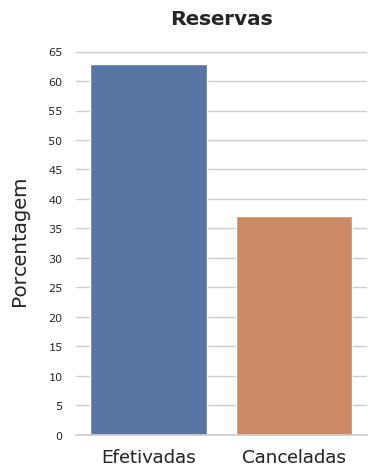

In [8]:
sns.set_theme(style='whitegrid', font='verdana', font_scale = 1.2)
plt.figure(figsize= (4, 5))

ax= sns.barplot(x= df['is_canceled'].value_counts().index, y= df['is_canceled'].value_counts(normalize= True).mul(100).round(2))
ax.set_title('Reservas', pad= 15, fontweight= 'bold')
ax.set_xticklabels(['Efetivadas', 'Canceladas'])
ax.set_ylabel('Porcentagem', labelpad= 14)
ax.set_yticks(np.arange(0, 70, 5))
ax.set_yticklabels(np.arange(0, 70, 5), fontsize= 8)
ax.spines[['top', 'right', 'left']].set_visible(False)

plt.tight_layout()

In [9]:
df['arrival_date_month'] = pd.Categorical(values = df['arrival_date_month'], 
                                          categories = ['January', 'February', 'March', 'April','May', 'June', 
                                                        'July', 'August', 'September','October', 'November', 'December'])

#Para trabalhar apenas com os dados que correspondem a reservas bem sucedidas: 
df_not_canceled = df.loc[df['is_canceled'] == 0, :] 

#Para trabalhar apenas com os dados que correspondem a reservas não sucedidas: 
df_canceled = df.loc[df['is_canceled'] == 1, :]  

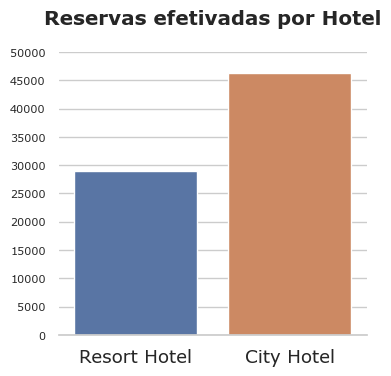

In [10]:
sns.set_theme(style='whitegrid', font='verdana', font_scale = 1.2)
plt.figure(figsize=(4,4))

ax = sns.countplot(data= df, x= df_not_canceled['hotel'])
ax.set_title('Reservas efetivadas por Hotel', pad= 20, fontweight= 'bold')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks(np.arange(0, 55000, 5000))
ax.set_yticklabels(np.arange(0, 55000, 5000), fontsize= 8)
ax.spines[['top', 'right', 'left']].set_visible(False)

plt.tight_layout()

In [11]:
df_not_canceled['hotel'].value_counts(normalize= True).mul(100).round(2)

City Hotel      61.5
Resort Hotel    38.5
Name: hotel, dtype: float64

In [12]:
df_not_canceled['hotel'].value_counts().sum()

75166

In [42]:
group_year = pd.DataFrame(df_not_canceled.groupby(['arrival_date_year', 
                                                   'arrival_date_month'])['arrival_date_day_of_month'].count().unstack())

group_year.style.applymap(
    lambda x: 'background-color: red' if x == group_year.values.max() else None).applymap(
    lambda x: 'background-color: blue' if x == np.min(group_year.values[np.nonzero(group_year.values)]) else None)

arrival_date_month,January,February,March,April,May,June,July,August,September,October,November,December
arrival_date_year,,,,,,,,,,,,
2015,0,0,0,0,0,0,1517,2291,3020,3225,1854,1947
2016,1691,2554,3347,3367,3563,3196,3073,3238,3372,3689,2818,2462
2017,2431,2818,3298,3198,3551,3208,3329,3109,0,0,0,0


- Do total de reservas, 37,04% foram canceladas e 62,96% não foram canceladas. Temos um **desbalanceamento de classe**.

- Os meses que não houve reservas se justificam pois o data set não abrangeu esse período.

- O total de reservas bem sucedidas foi: 75.166

- Desse total, 38,5% (28.938) foram de reservas para o Resort Hotel e 61,5% (46.228) para o City Hotel.

- Dentro do período de abrangência do data set, os meses que **mais** e **menos** houve chegada de novos hóspedes foram **Outubro de 2016** e **Julho de 2015**. 

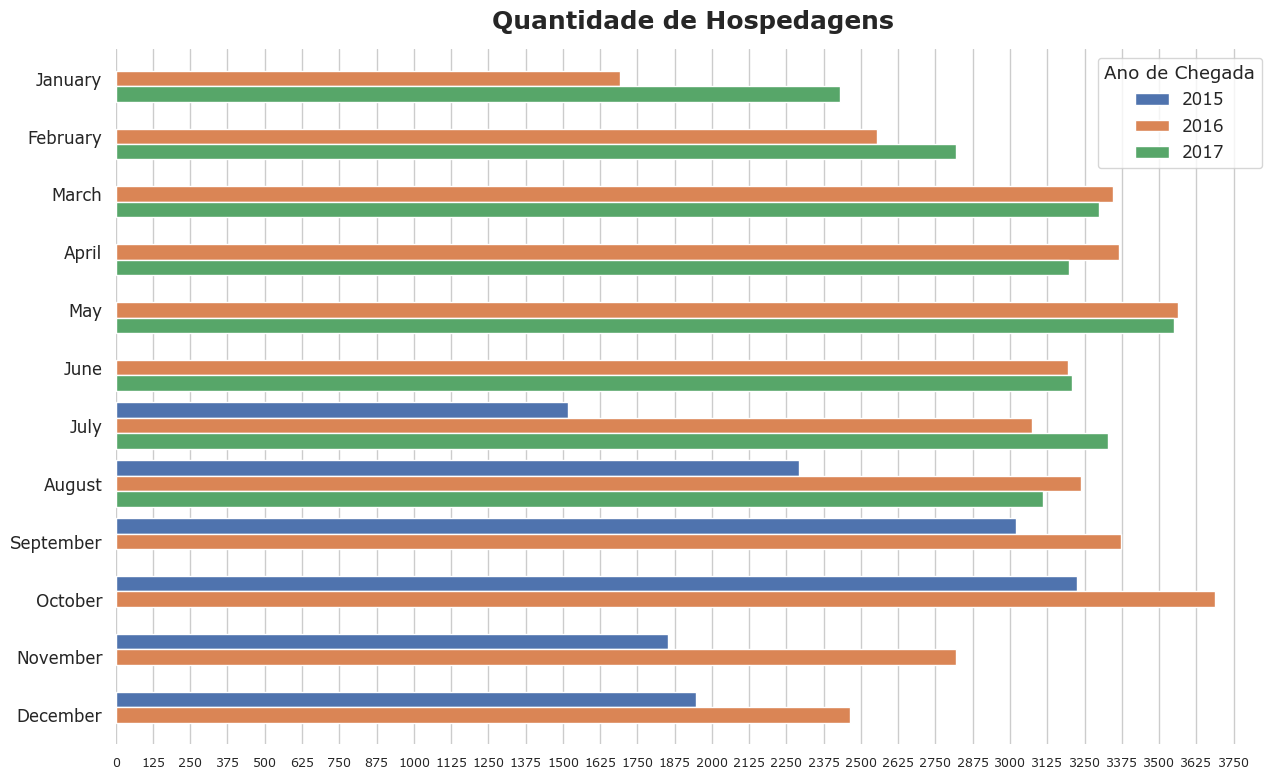

In [14]:
sns.set_theme(style='whitegrid', font='verdana', font_scale = 1.1)
plt.figure(figsize=(13, 8))

ax = sns.countplot(y = df_not_canceled['arrival_date_month'], hue= df_not_canceled['arrival_date_year'], saturation = 0.95)

ax.set_title('Quantidade de Hospedagens', fontsize = 18, fontweight= 'bold', pad = 15)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks(np.arange(0, 3875, 125))
ax.set_xticklabels(np.arange(0, 3875, 125), fontsize= 9)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

plt.legend(title= 'Ano de Chegada', labels= np.unique(df['arrival_date_year']), loc= 'upper right')

plt.tight_layout()

### Análise Estadia

In [15]:
df_not_canceled['stays_in_week_nights'].sum() + df_not_canceled['stays_in_weekend_nights'].sum()

255040

In [16]:
group_stays = pd.DataFrame(df_not_canceled.groupby(['hotel'])[['stays_in_weekend_nights', 
                                                               'stays_in_week_nights']].sum().reset_index())
group_stays

,hotel,stays_in_weekend_nights,stays_in_week_nights
0,City Hotel,37014,98139
1,Resort Hotel,32813,87074


In [17]:
stays_max = group_stays.iloc[:, 1:3].apply(np.sum, axis= 1)

print(((group_stays.iat[0,1] / (stays_max[0]))*100).round(2))
print(((group_stays.iat[0,2] / (stays_max[0]))*100).round(2))
print('')
print(((group_stays.iat[1,1] / (stays_max[1]))*100).round(2))
print(((group_stays.iat[1,2] / (stays_max[1]))*100).round(2))

27.39
72.61

27.37
72.63


- A estadia total programada nos hoteis foi de 255.040 dias.

- O total de estadias programadas no City Hotel foi de 135.153 dias. Desse total, 72.6% (98.139) foram estadias em dias de semana e 27.39% (37.014) foram aos finais de semana.

- O total de estadias programadas no Resort Hotel foi de 119.887 dias. Desse total, 72.63% (87.074) foram estadias em dias de semana e 27.37% (32.813) foram aos finais de semana.

- Devido a proporção quase idêntica de estadias de fim de semana e dias de semana entre os hoteis, provavelmente esses valores correspondam à proporção de dias na semana e não a alguma predileção específica entre momento da semana e a qual o hotel escolher.  

In [18]:
# Estadias em dias de semana por mês - Todos os Anos

group_stays2 = pd.DataFrame(df_not_canceled.groupby(
    ['arrival_date_month', 'arrival_date_year'])['stays_in_week_nights'].sum().unstack())

group_stays2.style.applymap(
    lambda x: 'background-color: red' if x == group_stays2.values.max() else None).applymap(
    lambda x: 'background-color: blue' if x == np.min(group_stays2.values[np.nonzero(group_stays2.values)]) else None)  

arrival_date_year,2015,2016,2017
arrival_date_month,,,
January,0,3102,5220
February,0,5042,6287
March,0,7758,8511
April,0,7599,7995
May,0,8474,8768
June,0,8358,8495
July,4718,8508,8839
August,6535,9052,8865
September,8002,8648,0


In [19]:
## Estadias em dias de semana por mês - 2016

group_stays2.iloc[:, 1].sort_values(ascending= False)

arrival_date_month
August       9052
September    8648
July         8508
May          8474
June         8358
October      8300
March        7758
April        7599
November     6552
December     5618
February     5042
January      3102
Name: 2016, dtype: int64

In [20]:
# Estadias aos finais de semana por mês - Todos os Anos

group_stays2 = pd.DataFrame(df_not_canceled.groupby(
    ['arrival_date_month', 'arrival_date_year'])['stays_in_weekend_nights'].sum().unstack())

group_stays2.style.applymap(
    lambda x: 'background-color: red' if x == group_stays2.values.max() else None).applymap(
    lambda x: 'background-color: blue' if x == np.min(group_stays2.values[np.nonzero(group_stays2.values)]) else None)  

arrival_date_year,2015,2016,2017
arrival_date_month,,,
January,0,1133,1877
February,0,2009,2450
March,0,2522,3020
April,0,2934,3267
May,0,3173,3201
June,0,3049,3244
July,1757,3460,3630
August,2622,3445,3270
September,3043,3265,0


In [21]:
# Estadias aos finais de semana por mês - 2016

group_stays2.iloc[:, 1].sort_values(ascending= False)

arrival_date_month
October      3496
July         3460
August       3445
September    3265
May          3173
June         3049
April        2934
March        2522
November     2305
February     2009
December     1996
January      1133
Name: 2016, dtype: int64

- Analisando o ano de 2016 onde se tem computado os dados do ano inteiro: Percebe-se que os meses onde se programou passar mais estadias (**entre Junho e Agosto**) ocorrem no período de **férias** escolares/universitárias e também do **verão**. Essa pode ser uma correlação verdadeira. Em contrapartida, visto que no final do ano e início do ano seguinte se tem o **outono/inverno**, esse pode ter sido o motivo que justificou as **menores** quantidades de **estadias entre Novembro e Fevereiro**, além de não ser um período comum de férias. Importante frisar que correlação não implica em causalidade. Portanto a possibilidade levantada é mera hipótese.

- Analisando todos os meses: O mês onde se programou mais estadias durante a semana foi **Agosto de 2016** (9052) e nos fins de semana foi **Julho de  2017** (3630). O mês onde se programou menos estadias durante a semana e aos fins de semana foi **Janeiro de 2016**. Observando as tabelas, percebe-se que a teoria levantada no tópico anterior também se replica na análise geral dos meses.

- Interessante observar que o mês onde chegou mais hóspedes (Outubro de 2016, conforme análise prévia) não é o mês que tem mais estadias (Agosto de 2016) se considerarmos apenas esse ano.

### Análise - Composição dos Hóspedes

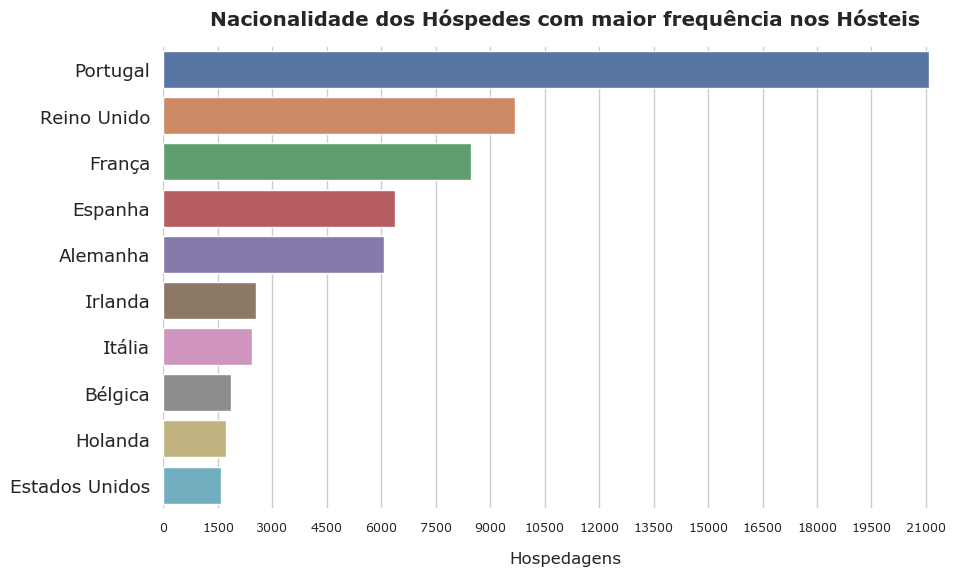

In [22]:
df_country_not_canceled = pd.DataFrame(df_not_canceled['country'].value_counts(dropna=False)[0:10]).reset_index(drop=False)
df_country_not_canceled.columns = ['Country', 'Bookings']
labels = df_country_not_canceled['Country'].replace({'PRT':'Portugal', 'GBR':'Reino Unido', 'FRA':'França',
                                     'ESP':'Espanha', 'DEU':'Alemanha', 'ITA':'Itália',
                                     'IRL':'Irlanda', 'BEL':'Bélgica', 'USA':'Estados Unidos', 
                                     'NLD':'Holanda'})

sns.set_theme(style='whitegrid', font='verdana', font_scale = 1.2)
plt.figure(figsize=(10, 6))

ax = sns.barplot(y= df_country_not_canceled['Country'], x= df_country_not_canceled['Bookings'])
ax.set_title('Nacionalidade dos Hóspedes com maior frequência nos Hósteis', pad= 15, fontweight= 'bold')
ax.set_ylabel('')
ax.set_xlabel('Hospedagens', labelpad= 12, fontsize= 12)
ax.set_yticklabels(labels)
ax.set_xticks(np.arange(0, 22500, 1500))
ax.set_xticklabels(np.arange(0, 22500, 1500), fontsize= 9)
ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.tight_layout()

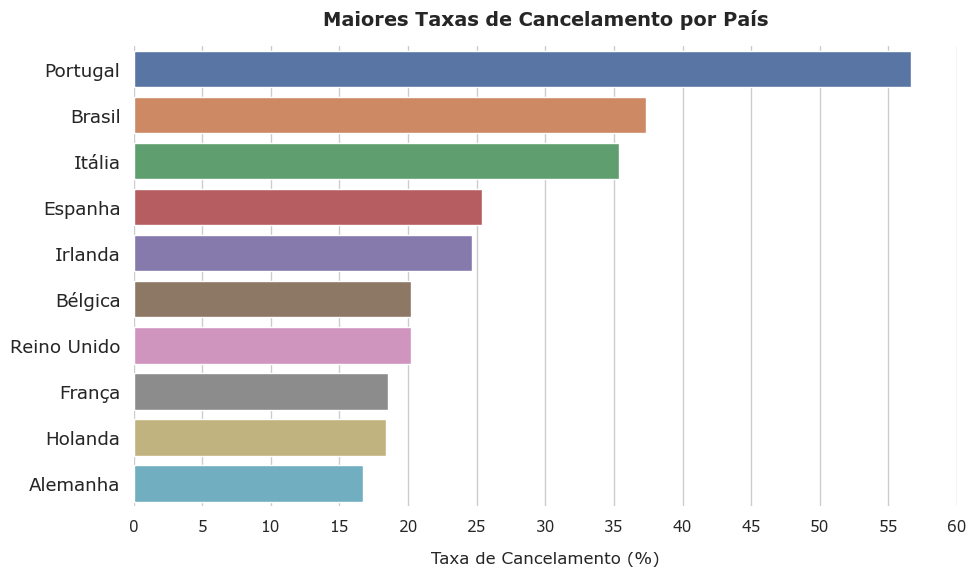

In [23]:
countries = df['country'].value_counts()[0:10].index
df_country_cancellations = pd.DataFrame(df[df['country'].isin(countries)].groupby('country')['is_canceled']\
                                        .mean().mul(100).round(2).sort_values(ascending= False)).reset_index()

df_country_cancellations.columns = ['Country', 'Cancellation Rate (%)']
labels_2 = df_country_cancellations['Country'].replace({'PRT':'Portugal', 'GBR':'Reino Unido', 'FRA':'França',
                                     'ESP':'Espanha', 'DEU':'Alemanha', 'ITA':'Itália',
                                     'IRL':'Irlanda', 'BEL':'Bélgica', 'BRA':'Brasil', 
                                     'NLD':'Holanda'})

sns.set_theme(style='whitegrid', font='verdana', font_scale = 1.2)
plt.figure(figsize=(10, 6))

ax = sns.barplot(y= df_country_cancellations['Country'], x= df_country_cancellations['Cancellation Rate (%)'])
ax.set_title('Maiores Taxas de Cancelamento por País', pad= 15, fontweight= 'bold', fontsize= 14)
ax.set_ylabel('')
ax.set_yticklabels(labels_2)
ax.set_xlabel('Taxa de Cancelamento (%)', labelpad= 12, fontsize= 12)
ax.set_xticks(np.arange(0, 65, 5))
ax.set_xticklabels(np.arange(0, 65, 5), fontsize= 11)
ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.tight_layout()

In [24]:
group_composition = pd.DataFrame(df_not_canceled.groupby(['hotel'])[['adults', 'children', 'babies']].sum().reset_index())
group_composition

## Verificar a proporção de famílias com criança no Resort e no City

,hotel,adults,children,babies
0,City Hotel,84510,4618.0,328
1,Resort Hotel,53024,3075.0,452


In [38]:
children_frame = pd.DataFrame(df.groupby('children')['is_canceled'].mean().mul(100).round(2))
children_frame['Quantidade Total (%)'] = df['children'].value_counts(dropna= False, normalize= True).mul(100).round(3)
children_frame.columns = ['Taxa de Cancelamento (%)', 'Quantidade Total (%)']
children_frame.sort_values('Taxa de Cancelamento (%)', ascending= False)

,Taxa de Cancelamento (%),Quantidade Total (%)
children,,
10.0,100.00,0.001
2.0,42.20,3.059
0.0,37.09,92.802
1.0,32.24,4.072
3.0,22.37,0.064


In [40]:
adults_frame = pd.DataFrame(df.groupby('adults')['is_canceled'].mean().mul(100).round(2))
adults_frame['Quantidade Total (%)'] = df['adults'].value_counts(dropna= False, normalize= True).mul(100).round(3)
adults_frame.columns = ['Taxa de Cancelamento (%)', 'Quantidade Total (%)']
adults_frame.sort_values('Taxa de Cancelamento (%)', ascending= False)

,Taxa de Cancelamento (%),Quantidade Total (%)
adults,,
5,100.00,0.002
6,100.00,0.001
10,100.00,0.001
20,100.00,0.002
26,100.00,0.004
27,100.00,0.002
40,100.00,0.001
50,100.00,0.001
55,100.00,0.001


In [25]:
#Proporção de crianças e bebês

((group_composition.drop(columns= ['hotel', 'adults']).apply(lambda x: sum(x), axis= 1) / 
 group_composition.drop(columns= 'hotel').apply(lambda x: sum(x), axis= 1)).round(3))*100

0    5.5
1    6.2
dtype: float64

In [33]:
meal_frame = pd.DataFrame(df.groupby('meal')['is_canceled'].mean().mul(100).round(2))
meal_frame['Quantidade Total (%)'] = df['meal'].value_counts(dropna= False, normalize= True).mul(100).round(2)
meal_frame.columns = ['Taxa de Cancelamento (%)', 'Quantidade Total (%)']
meal_frame.sort_values('Taxa de Cancelamento (%)', ascending= False)

,Taxa de Cancelamento (%),Quantidade Total (%)
meal,,
FB,59.90,0.67
BB,37.38,77.32
SC,37.24,8.92
HB,34.46,12.11
Undefined,24.47,0.98


In [27]:
df_not_canceled['customer_type'].value_counts(normalize= True).mul(100).round(2)

Transient          70.64
Transient-Party    24.92
Contract            3.74
Group               0.69
Name: customer_type, dtype: float64

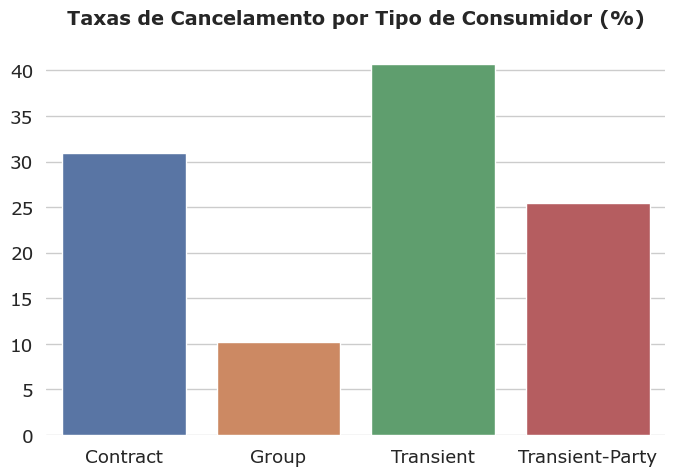

In [28]:
customertype_cancellations = pd.DataFrame(df.groupby('customer_type')['is_canceled'].mean().mul(100).round(2)).reset_index()
customertype_cancellations.rename(columns= {'is_canceled':'Taxa de Cancelamento (%)', 
                                            'customer_type':'Tipo de Reserva'}, inplace= True)

sns.set_theme(style='whitegrid', font='verdana', font_scale = 1.2)
plt.figure(figsize=(7, 5))

ax = sns.barplot(x= customertype_cancellations['Tipo de Reserva'], y= customertype_cancellations['Taxa de Cancelamento (%)'])
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
ax.set_title('Taxas de Cancelamento por Tipo de Reserva (%)', pad= 15, fontweight= 'bold', fontsize= 14)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.tight_layout()

- A grande maioria dos hóspedes que chegaram no hotel são da Europa e, em sua imensa maioria, de **Portugal**.

- Dentre os países que mais efetuaram cancelamentos, apenas o Brasil não figura também como um dos países que tiveram mais hóspedes no hotel. Apesar de Portugal ser o país que mais realiza cancelamentos, a quantidade de clientes é tão grande que ainda assim esse país é o que mais abriga hóspedes nos hotéis em questão.

- A **maioria dos reservas** são classificadas como **transientes**.

- Olhando para os tipos de reservas, percebe-se que a **maioria das que cancelam** são **transientes** (40,75%), seguidas pelas reservas por **contrato** (30,96%).

- Do total de pessoas que frequentaram o **City Hotel**, **5,5%** são crianças/bebês.

- Do total de pessoas que frequentaram o **Resort Hotel**, **6.2%** são crianças/bebês.

- Percebe-se que a diferença não é muito significativa. Portanto, existe a possibilidade de não haver uma predileção específica em levar crianças/bebês para um tipo de hotel específico.

- Tanto no caso do número de **adultos** como no caso do número de **crianças**, quanto **maior o número de pessoas** que compõem o grupo da reserva, **provavelmente** há uma **maior tendência** para que essa **reserva** seja **cancelada**. 

- A refeição que inclui café da manhã, almoço e jantar (FB - Full Board), que teoricamente deveria ser a mais lucrativa para os hotéis, é a que está presente em menor quantidade (valor praticamente irrisório, 0,67%) e também é a que possui a maior taxa de cancelamento (59,9%). Um ponto de atenção. No que tange aos demais tipos, as taxas de cancelamento estão muito parecidas. 